In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

In [14]:
df = pd.read_csv(r'C:\Users\Bhavi\Downloads\house_data.csv')
df.dropna(inplace=True)
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [15]:
df = df.drop('stores', axis=1)
df.head()

,date,age,distance,latitude,longitude,price
0,2009,21,9,84,121,14264
1,2007,4,2,86,121,12032
2,2016,18,3,90,120,13560
3,2002,13,2,80,128,12029
4,2014,25,5,81,122,14157


In [16]:
df.describe()

,date,age,distance,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2008.912800,18.945000,4.977800,84.97140,124.994200,13906.638600
std,5.457578,11.329539,3.199837,3.16199,3.167992,1020.774876
min,2000.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,2004.000000,9.000000,2.000000,82.00000,122.000000,13197.750000
50%,2009.000000,19.000000,5.000000,85.00000,125.000000,13893.500000
75%,2014.000000,29.000000,8.000000,88.00000,128.000000,14614.000000
max,2018.000000,38.000000,10.000000,90.00000,130.000000,16964.000000


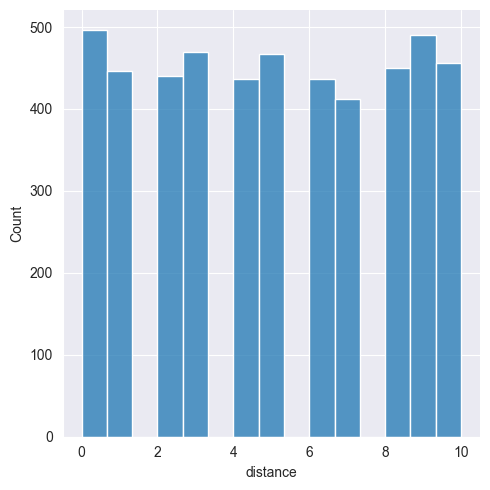

In [17]:
sns.displot(df['distance'])

<Axes: xlabel='distance', ylabel='price'>

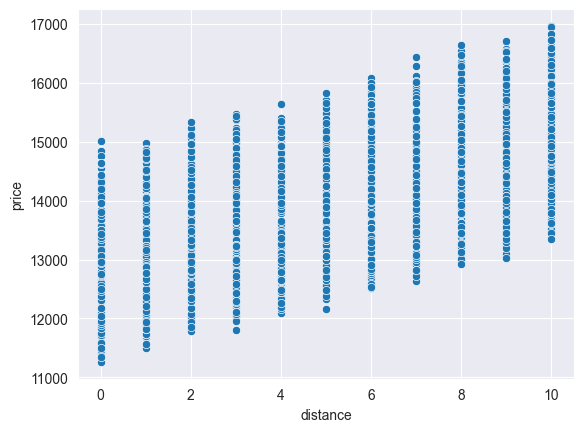

In [18]:
sns.scatterplot(x='distance', y='price', data=df)

In [23]:
inputs = df.drop('latitude', axis=1)
output = df['latitude']
output.head()

0    84
1    86
2    90
3    80
4    81
Name: latitude, dtype: int64

In [33]:
#Partition the data for training

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, output_train, output_test = train_test_split(inputs, output, test_size=0.3, random_state=5000)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputs_train_scaled = scaler.fit_transform(inputs_train)
inputs_test_scaled = scaler.transform(inputs_test)

In [35]:
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=True, patience=5000)

In [42]:
model.fit(x=inputs_train_scaled, y=output_train.values, validation_data=(inputs_test_scaled, output_test.values), batch_size=5000, epochs=5000, callbacks=[stop], verbose=True)

Epoch 1/5000
1/1 [==============================] - 0s 107ms/step - loss: 4053.9358 - val_loss: 2391.1414
Epoch 2/5000
1/1 [==============================] - 0s 57ms/step - loss: 4049.4778 - val_loss: 2386.9055
Epoch 3/5000
1/1 [==============================] - 0s 52ms/step - loss: 4145.4507 - val_loss: 2382.5513
Epoch 4/5000
1/1 [==============================] - 0s 52ms/step - loss: 4121.5127 - val_loss: 2378.0942
Epoch 5/5000
1/1 [==============================] - 0s 52ms/step - loss: 4148.3711 - val_loss: 2373.6396
Epoch 6/5000
1/1 [==============================] - 0s 62ms/step - loss: 4097.5605 - val_loss: 2369.1475
Epoch 7/5000
1/1 [==============================] - 0s 60ms/step - loss: 4039.8674 - val_loss: 2364.5344
Epoch 8/5000
1/1 [==============================] - 0s 56ms/step - loss: 4045.4927 - val_loss: 2359.8501
Epoch 9/5000
1/1 [==============================] - 0s 62ms/step - loss: 3996.7178 - val_loss: 2355.0557
Epoch 10/5000
1/1 [==============================] - 0

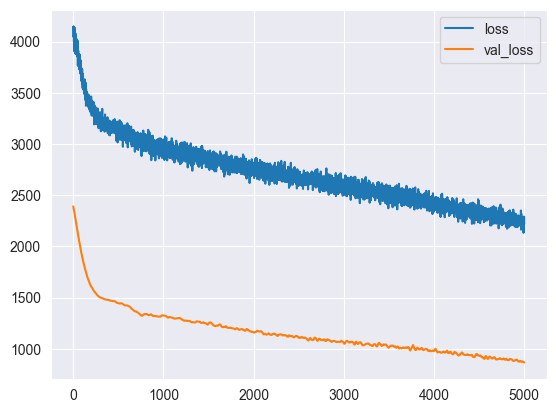

In [43]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [44]:
predictions = model.predict(inputs_test_scaled)

47/47 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Avg Absolute Error: ", mean_absolute_error(output_test, predictions))

print("Avg Squared Error: ", np.sqrt(mean_squared_error(output_test, predictions)))

Avg Absolute Error:  29.273302355448404
Avg Squared Error:  29.44138427240538
